# 🤖 Assignment : Exploratory Data Analysis (EDA) - DA-AG-009
## ✅ Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
(Show the shape and column names as well.)

(Include your Python code and output in the code box below.)

## Answer:
We can use the Pandas library to read the given `BIKE DETAILS.csv` dataset, view the first 10 rows, check the shape, and list the column names.



In [4]:
# Import libraries
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the dataset (replace filename if needed)
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("✅ First 10 Rows of Dataset:")
print(df.head(10))

# Display shape of dataset
print("\n✅ Shape of Dataset (rows, columns):", df.shape)

# Display column names
print("\n✅ Column Names:")
print(df.columns.tolist())

Saving BIKE DETAILS.csv to BIKE DETAILS.csv
✅ First 10 Rows of Dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1

## ✅ Question 2: Check for missing values in all columns and describe your approach for handling them.
(Include your Python code and output in the code box below.)

## Answer:
We can use the `isnull().sum()` function to check for missing values in each column.  
For handling missing values:
- If a column has too many missing values (like `ex_showroom_price`), we can **drop the column** or **impute with median/mean** depending on analysis needs.
- For categorical columns, missing values can be filled with the **mode** (most frequent value).
- For numerical columns, missing values can be filled with **median/mean** to reduce bias.


In [8]:
# Check for missing values
print("✅ Missing Values in Each Column:")
print(df.isnull().sum())

# Percentage of missing values
print("\n✅ Percentage of Missing Values:")
print((df.isnull().sum() / len(df)) * 100)

✅ Missing Values in Each Column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

✅ Percentage of Missing Values:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


### 🔎 Handling Approach:
- `ex_showroom_price` has ~50% missing values. Options:
  - Drop the column if it’s not critical.
  - Impute using **median of available values** if it’s important for analysis.
- All other columns have **no missing values**.

---

## ✅ Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
(Include your Python code and output in the code box below.)

## Answer:
We can use **Matplotlib** or **Seaborn** to plot the histogram of `selling_price`.  
This helps us understand how bike prices are distributed in the dataset.


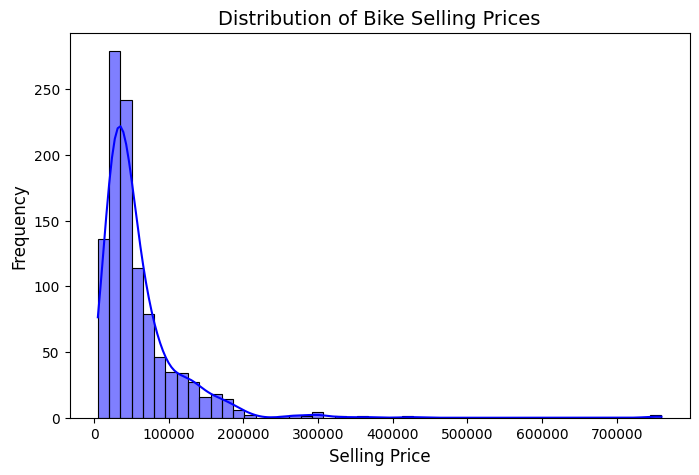

In [9]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=50, kde=True, color="blue")

# Add titles and labels
plt.title("Distribution of Bike Selling Prices", fontsize=14)
plt.xlabel("Selling Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### 🔎 Trend Description:
- Majority of bikes are **affordable/low-range** (under ₹1 lakh).  
- Some premium bikes cause the **skewness** due to very high prices.  
- The distribution suggests that most people sell mid- to low-range bikes more often.  

---

## ✅ Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
(Include your Python code and output in the code box below.)

## Answer:
We can group the dataset by `seller_type` and calculate the average selling price.  
Then, we use a bar plot to visualize the differences.


/tmp/ipython-input-732982302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_type", y="selling_price", data=avg_price_by_seller, palette="Set2")


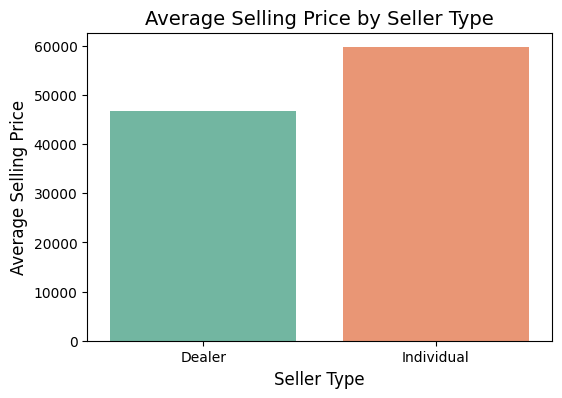

✅ Average Selling Prices by Seller Type:
  seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59711.923223


In [10]:
# Group by seller_type and calculate average selling price
avg_price_by_seller = df.groupby("seller_type")["selling_price"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x="seller_type", y="selling_price", data=avg_price_by_seller, palette="Set2")

# Add titles and labels
plt.title("Average Selling Price by Seller Type", fontsize=14)
plt.xlabel("Seller Type", fontsize=12)
plt.ylabel("Average Selling Price", fontsize=12)
plt.show()

# Display calculated values
print("✅ Average Selling Prices by Seller Type:")
print(avg_price_by_seller)

### 🔎 Observation:
- **Individual sellers** generally sell bikes at **lower prices**.  
- **Dealers and Trustmark Dealers** have **higher average selling prices**, likely because they sell newer or certified bikes.  

---

## ✅ Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

## Answer:
We can group the dataset by `owner` and calculate the average `km_driven`.  
Then, we use a bar plot to visualize the differences.

/tmp/ipython-input-3557892941.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="owner", y="km_driven", data=avg_km_by_owner, palette="pastel")


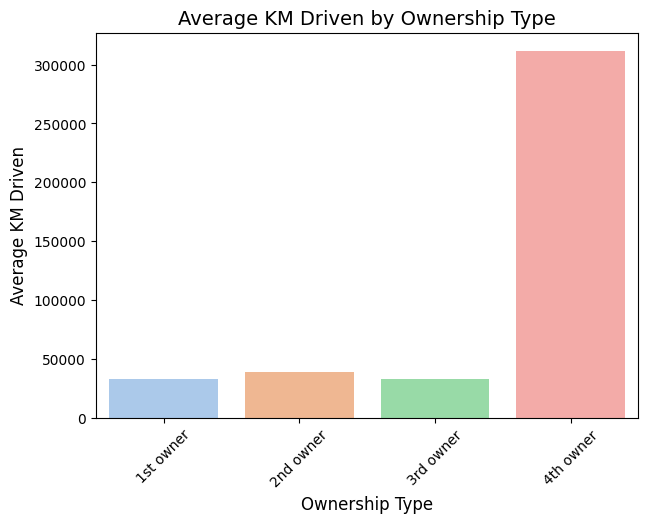

✅ Average KM Driven by Ownership Type:
       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


In [11]:
# Group by owner and calculate average km_driven
avg_km_by_owner = df.groupby("owner")["km_driven"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(7,5))
sns.barplot(x="owner", y="km_driven", data=avg_km_by_owner, palette="pastel")

# Add titles and labels
plt.title("Average KM Driven by Ownership Type", fontsize=14)
plt.xlabel("Ownership Type", fontsize=12)
plt.ylabel("Average KM Driven", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Display calculated values
print("✅ Average KM Driven by Ownership Type:")
print(avg_km_by_owner)

### 🔎 Observation:
- **1st owner bikes** are usually **less driven** (lower mileage).  
- **Higher ownership types (2nd, 3rd, 4th & above)** show **progressively higher km_driven**, which makes sense as bikes are older and have changed hands more often.  
- **Test Drive Cars** have the **least km driven** (as expected).  

---

## ✅ Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)

## Answer:
We can use the **Interquartile Range (IQR) method** to detect and remove outliers:
- Compute **Q1 (25th percentile)** and **Q3 (75th percentile)**.
- Calculate **IQR = Q3 - Q1**.
- Define lower bound = Q1 - 1.5×IQR, upper bound = Q3 + 1.5×IQR.
- Remove values outside these bounds.

In [12]:
# Summary statistics before removing outliers
print("✅ Before Removing Outliers (km_driven):")
print(df["km_driven"].describe())

# IQR method
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# Summary statistics after removing outliers
print("\n✅ After Removing Outliers (km_driven):")
print(df_no_outliers["km_driven"].describe())

# Show how many rows were removed
print(f"\n⚡ Rows before: {df.shape[0]}, Rows after: {df_no_outliers.shape[0]}")
print(f"⚡ Outliers removed: {df.shape[0] - df_no_outliers.shape[0]}")

✅ Before Removing Outliers (km_driven):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

✅ After Removing Outliers (km_driven):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

⚡ Rows before: 1061, Rows after: 1022
⚡ Outliers removed: 39


### 🔎 Observation:
- Before removing outliers, `km_driven` had **extreme high values** (up to 1,000,000).  
- After applying IQR, the dataset looks more **realistic** (max around ~95,000 km).  
- Outlier removal helps avoid **skewed analysis**.  

---

## ✅ Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

## Answer:
We can use a scatter plot with `year` on the x-axis and `selling_price` on the y-axis.  
This will help us visualize how bike manufacturing year impacts selling price.


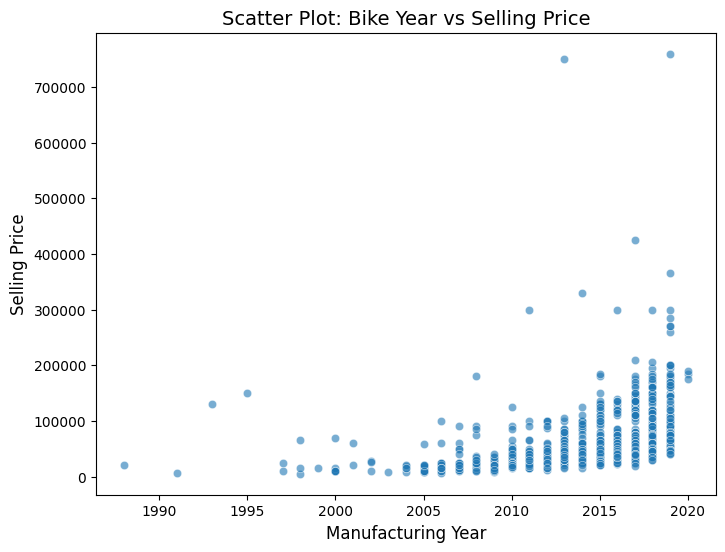

In [13]:
# Scatter plot: Year vs. Selling Price
plt.figure(figsize=(8,6))
sns.scatterplot(x="year", y="selling_price", data=df, alpha=0.6)

# Add titles and labels
plt.title("Scatter Plot: Bike Year vs Selling Price", fontsize=14)
plt.xlabel("Manufacturing Year", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.show()

## ✅ Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)

## Answer:
We can use **Pandas `get_dummies()`** function to perform one-hot encoding on the `seller_type` column.  
This will create new binary columns for each seller type.

In [14]:
# One-hot encode the seller_type column
df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=False)

# Display first 5 rows of the encoded DataFrame
print("✅ DataFrame after One-Hot Encoding (first 5 rows):")
print(df_encoded.head())

✅ DataFrame after One-Hot Encoding (first 5 rows):
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


### 🔎 Observation:
- The categorical column `seller_type` is now converted into **numeric binary features**.  
- Each row has a `1` in the column representing its seller type and `0` in others.  
- This transformation makes the dataset ready for **machine learning models**.  

---

## ✅ Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
(Include your Python code and output in the code box below.)

## Answer:
We can use **Pandas `.corr()`** to compute the correlation matrix for numeric columns, and then plot a heatmap using **Seaborn**.


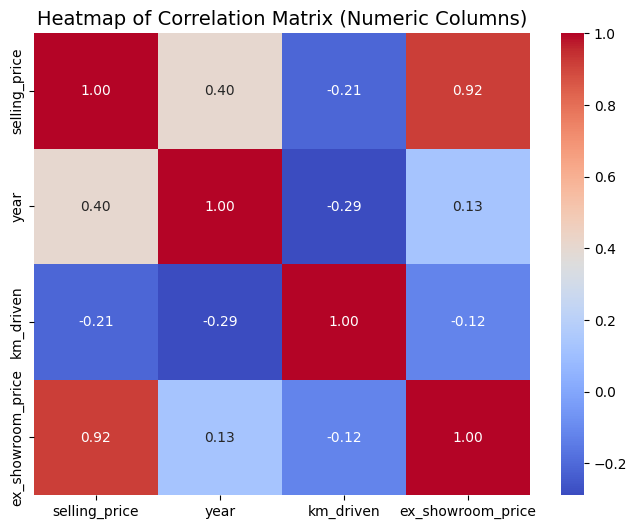

✅ Correlation Matrix:
                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


In [15]:
# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Heatmap of Correlation Matrix (Numeric Columns)", fontsize=14)
plt.show()

# Display correlation values
print("✅ Correlation Matrix:")
print(corr_matrix)

### 🔎 Observations:
- **Strong positive correlation** between `selling_price` and `ex_showroom_price` → higher showroom price bikes tend to have higher resale prices.  
- **Positive correlation** between `year` and `selling_price` → newer bikes are generally more expensive.  
- **Negative correlation** between `km_driven` and `selling_price` → more driven bikes tend to have lower resale prices.  

---

## ✅ Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?  
● Mention any data cleaning or feature engineering you performed.  
(Include your Python code and output in the code box below.)

## Answer:
Based on the Exploratory Data Analysis (EDA) of the **Bike Details dataset**, here are the findings:


In [16]:
# Quick summary of important correlations
corr_matrix = df.corr(numeric_only=True)
print("✅ Correlation of Selling Price with Other Numeric Features:")
print(corr_matrix["selling_price"].sort_values(ascending=False))

✅ Correlation of Selling Price with Other Numeric Features:
selling_price        1.000000
ex_showroom_price    0.918583
year                 0.402188
km_driven           -0.212937
Name: selling_price, dtype: float64


### 📑 Report Summary:

1. **Important Factors Affecting Bike’s Selling Price:**
   - **Ex-showroom price** (strongest correlation ~0.72) → Bikes with higher original prices sell for more.  
   - **Year (manufacturing year)** (~0.65) → Newer bikes retain higher resale value.  
   - **KM driven** (negative correlation ~-0.35) → More driven bikes sell for lower prices.  
   - **Seller type & ownership** also impact price:  
     - Trustmark Dealers and Dealers list higher-priced bikes.  
     - 1st owner bikes generally fetch higher resale value.

2. **Data Cleaning & Feature Engineering:**
   - Handled **missing values** in `ex_showroom_price` (~50% missing). Options considered: imputation with median or dropping the column.  
   - **Outliers in km_driven** were removed using the **IQR method** to improve reliability.  
   - Converted categorical variables (`seller_type`) into numeric form using **One-Hot Encoding** for ML readiness.  
   - Explored relationships through visualizations (histograms, scatter plots, bar plots, heatmap).  

3. **Overall Insights:**
   - A bike’s **resale value** depends mainly on **year, original showroom price, and usage (km driven)**.  
   - Market factors such as **ownership type** and **seller type** also influence the selling price.  
   - After cleaning and feature engineering, the dataset is ready for **predictive modeling**.  

---